# Linear regression

Notebook inspired by https://github.com/aymericdamien/TensorFlow-Examples/

In this notebook we'll implement a linear regression with Tensorflow.

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

%matplotlib inline

In [2]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

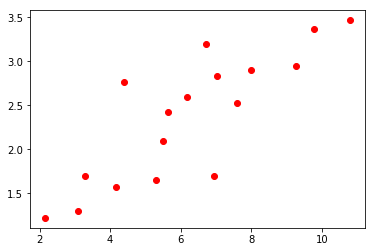

In [3]:
#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')

A linear regression is a model of type:

    Y = X * W + b

First we set some global parameters like the learning rate and the number of epochs we want to run

In [4]:
learning_rate = 0.001
training_epochs = 1000

## Exercise 1

1. define input placeholders, assign them to variables named `X` and `Y`
- define model variables W and b and assign them names `W` and `b`
- construct a linear model of the form `pred = X * W + b`
- define the cost as the mean of the squared error between `Y` and `pred`. You will need the function `tf.reduce_mean`

In [16]:
import numpy


X = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.multiply(X, W), b)


cost = tf.reduce_mean((y_pred-Y)*(y_pred-Y))

## Optimizer

In [17]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

learning_rate = 0.01
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(cost)

## Running the model

In [18]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.226244375 W= 0.323916 b= 0.139405
Epoch: 0100 cost= 0.201927975 W= 0.338019 b= 0.176073
Epoch: 0150 cost= 0.198910668 W= 0.337297 b= 0.195729
Epoch: 0200 cost= 0.196521938 W= 0.335233 b= 0.212082
Epoch: 0250 cost= 0.194407970 W= 0.333172 b= 0.226828
Epoch: 0300 cost= 0.192509070 W= 0.331247 b= 0.240387
Epoch: 0350 cost= 0.190787315 W= 0.329457 b= 0.252968
Epoch: 0400 cost= 0.189214543 W= 0.327783 b= 0.264719
Epoch: 0450 cost= 0.187769026 W= 0.326211 b= 0.275752
Epoch: 0500 cost= 0.186433464 W= 0.324729 b= 0.286155
Epoch: 0550 cost= 0.185194150 W= 0.323326 b= 0.296002
Epoch: 0600 cost= 0.184039652 W= 0.321995 b= 0.305353
Epoch: 0650 cost= 0.182960391 W= 0.320726 b= 0.314256
Epoch: 0700 cost= 0.181948557 W= 0.319515 b= 0.322754
Epoch: 0750 cost= 0.180997357 W= 0.318356 b= 0.330884
Epoch: 0800 cost= 0.180101007 W= 0.317246 b= 0.338676
Epoch: 0850 cost= 0.179254547 W= 0.316179 b= 0.346158
Epoch: 0900 cost= 0.178453550 W= 0.315154 b= 0.353353
Epoch: 0950 cost= 0.17769430

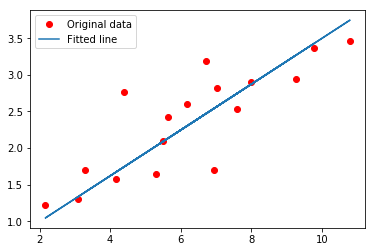

In [19]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Exercise 2:

1. Try to change the learning rate. what happens?
- Try using a different optimizer. what happens?